In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [7]:
df = pd.read_csv("../data/heart_disease_prepared.csv")

# split to evoidr data leakage (expose test data during training)
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

## Normalization and Standardization

Plot the initial distribution of age

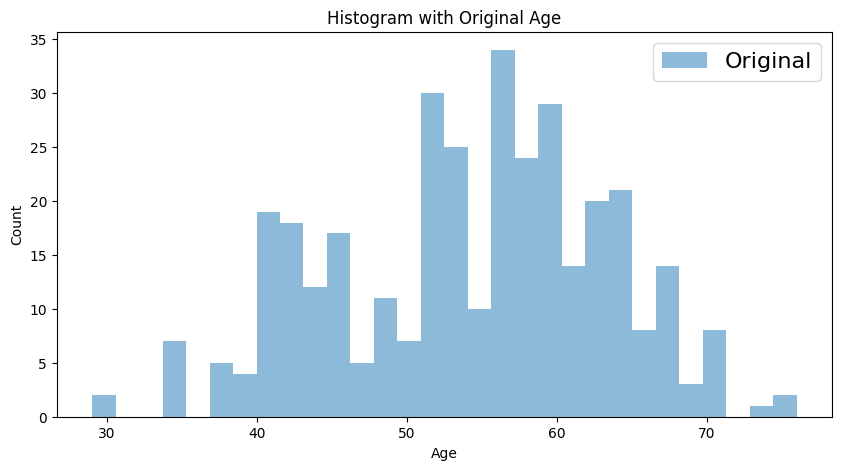

In [8]:
# Show the initial distribution of 'age'
age = X_train['age']
plt.figure(figsize=(10,5))
plt.hist(age, bins=30, alpha=0.5, label='Original')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Age'); 
plt.xlabel('Age'); plt.ylabel('Count');
plt.show()

Normalize and plot the age feature

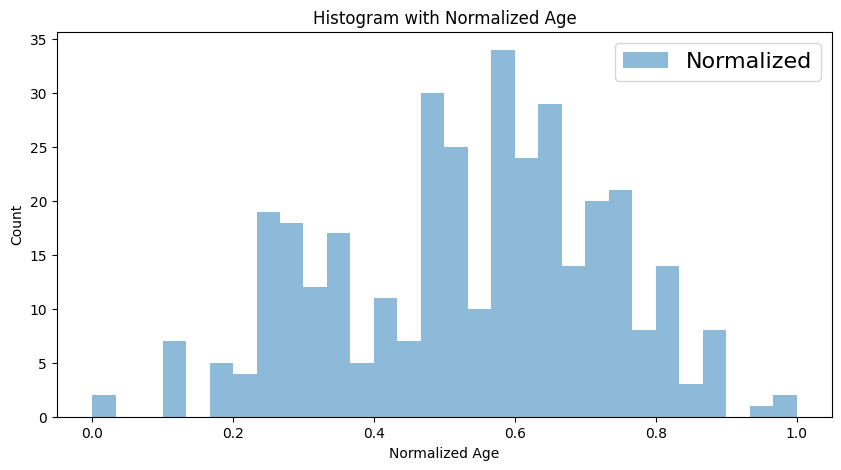

In [10]:
# Normalize 'age' on the training set.
normalizer = MinMaxScaler()
X_train['age'] = normalizer.fit_transform(X_train['age'].values.reshape(-1,1))

# Use the same normalizer to transform the 'age' column of the test set to avoid data leakage
X_test['age'] = normalizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Normalized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Count')
plt.show()

Standardize and plot the age feature.

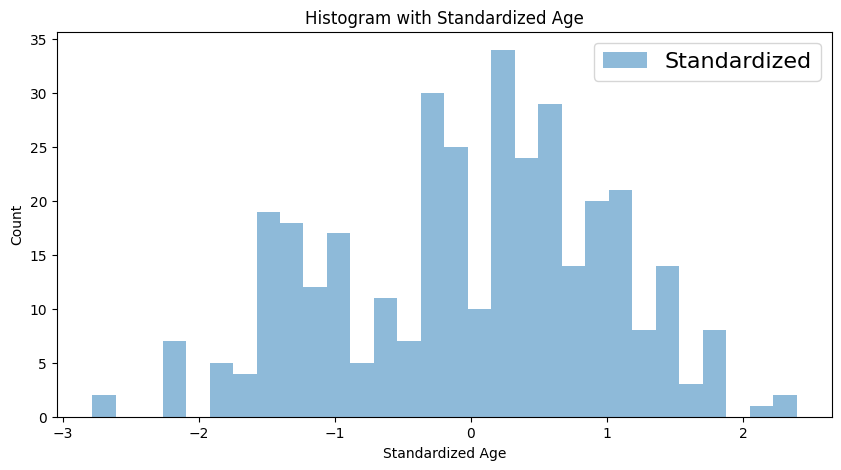

In [11]:
# Standardize 'age' on the training set and use the same standardizer to transform the 'age' column of the test set to avoid data leakage
standardizer = StandardScaler()
X_train['age'] = standardizer.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age'] = standardizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

## Feature selection

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

y_train = X_train.pop('target')
y_test = X_test.pop('target')

# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

c:\Users\LOQ\OneDrive\Bureau\Predicting heart disease_End-to-End ML\venv\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal'],
      dtype='object')

Selected features: Index(['cp', 'thalach', 'slope', 'ca', 'thal'], dtype='object')


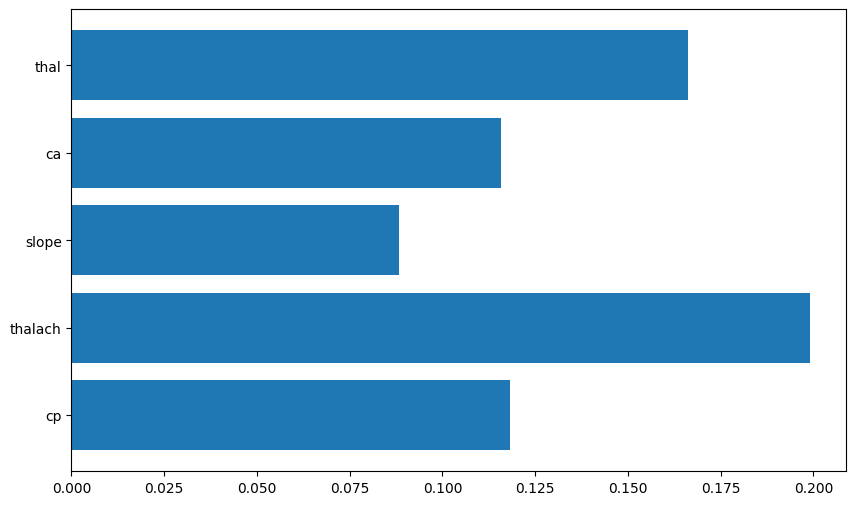

In [13]:
original_features = df.columns[:-1]
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool = model.get_support()

selected_features = original_features[features_bool]
print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.show()